In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

font = {'size'   : 15}
plt.matplotlib.rc('font', **font)

# PCA

In [2]:
df_X, df_y = load_iris(return_X_y=True, as_frame=True)
df_X['class'] = df_y
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
print(X.shape, X_new.shape)
print(pca.explained_variance_ratio_)

(150, 4) (150, 2)
[0.92461872 0.05306648]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.4, random_state=42)

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

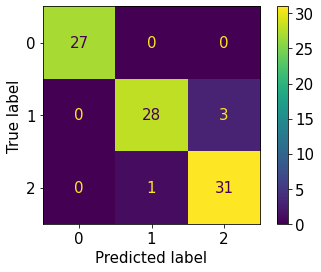

In [6]:
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

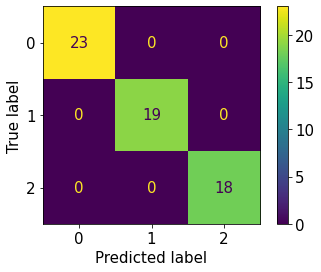

In [7]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_new, df_y, test_size=0.4, random_state=42)

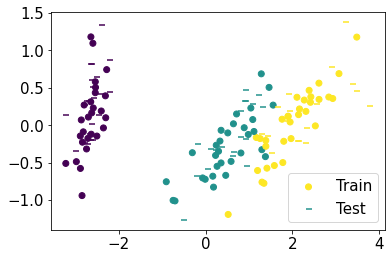

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test', marker='_')
plt.legend()
plt.show()

In [10]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

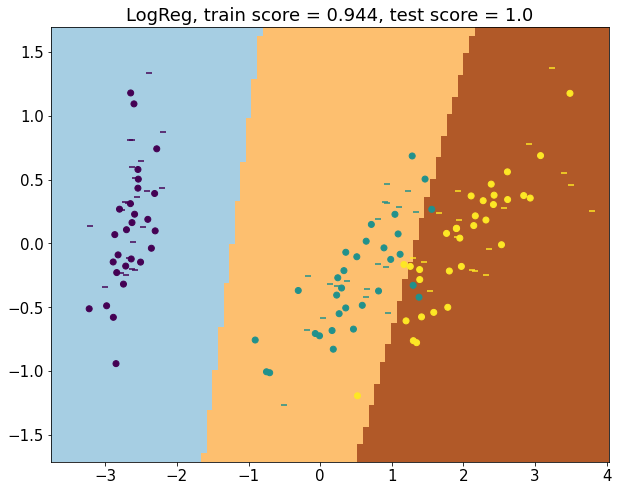

In [11]:
_, ax = plt.subplots(figsize=(10, 8))

DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

ax.set_title(f'LogReg, train score = {np.round(train_score, 3)}, test score = {np.round(test_score, 3)}')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test', marker='_')
# ax.legend()
plt.show()

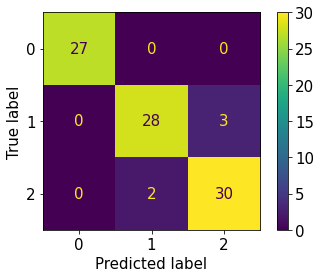

In [12]:
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

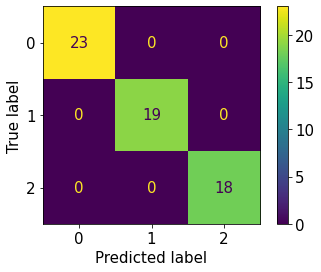

In [13]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Desicion Trees

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_new, df_y, test_size=0.4, random_state=42)

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

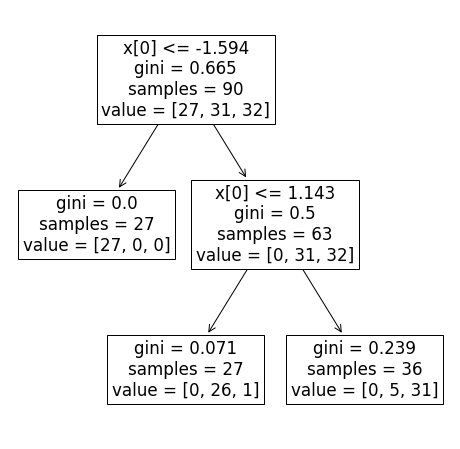

In [16]:
plt.figure(figsize=(8, 8))
tree.plot_tree(clf)
plt.show()

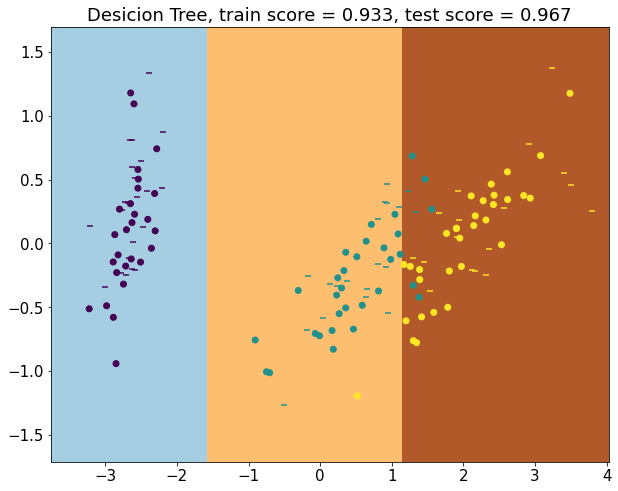

In [17]:
_, ax = plt.subplots(figsize=(10, 8))

DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

ax.set_title(f'Desicion Tree, train score = {np.round(train_score, 3)}, test score = {np.round(test_score, 3)}')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test', marker='_')
# ax.legend()
plt.show()

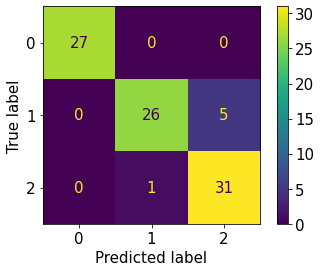

In [18]:
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

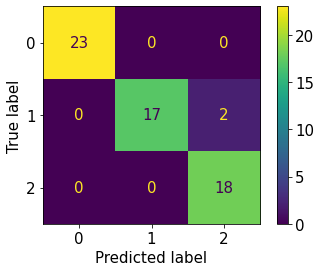

In [19]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

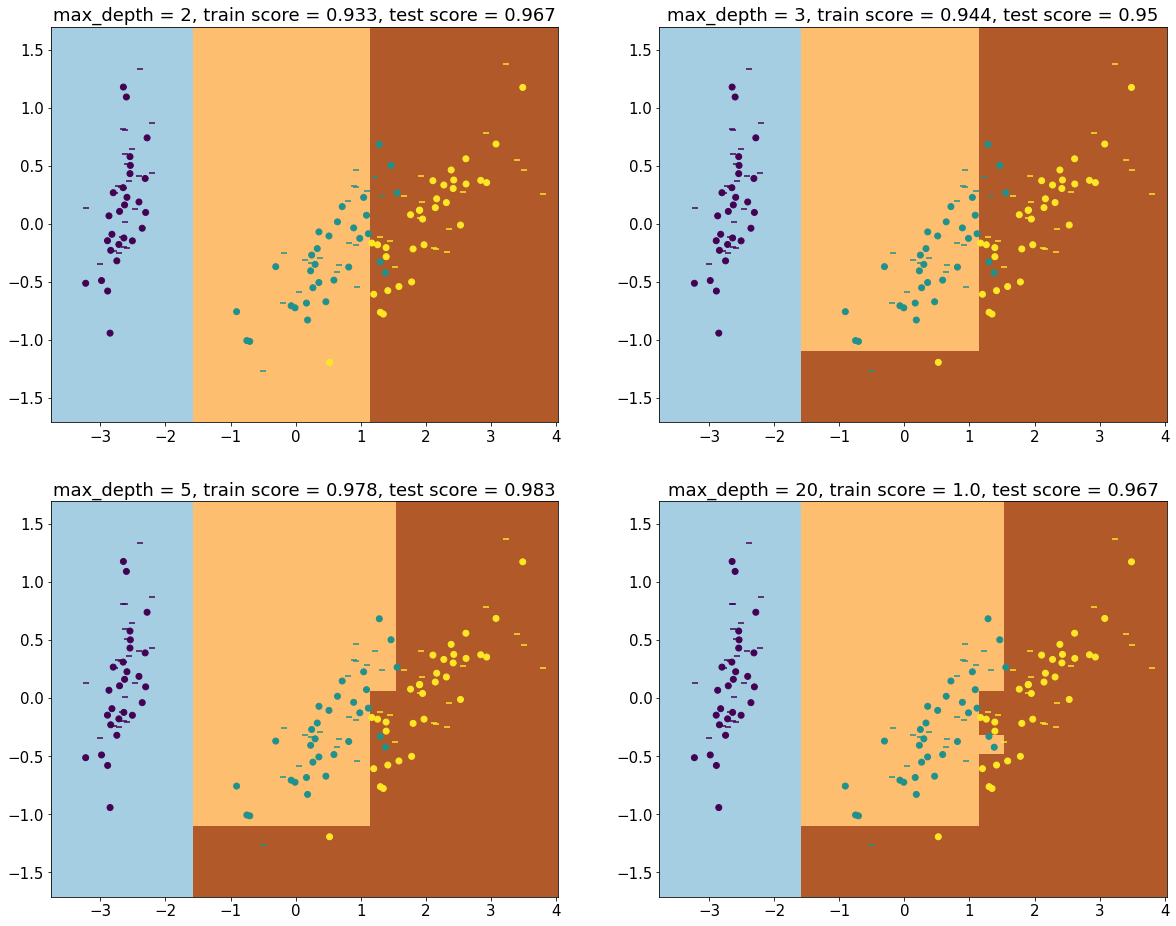

In [20]:
_, axs = plt.subplots(2, 2, figsize=(20, 16))

depth_lst = [2, 3, 5, 20]

for i, ax in enumerate(axs.ravel()):

    max_depth = depth_lst[i]

    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train, y_train)

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap=plt.cm.Paired,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        eps=0.5,
    )

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    ax.set_title(f'max_depth = {max_depth}, train score = {np.round(train_score, 3)}, test score = {np.round(test_score, 3)}')
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test', marker='_')

plt.show()

# SVM

In [21]:
clf = svm.LinearSVC()
clf = clf.fit(X_train, y_train)

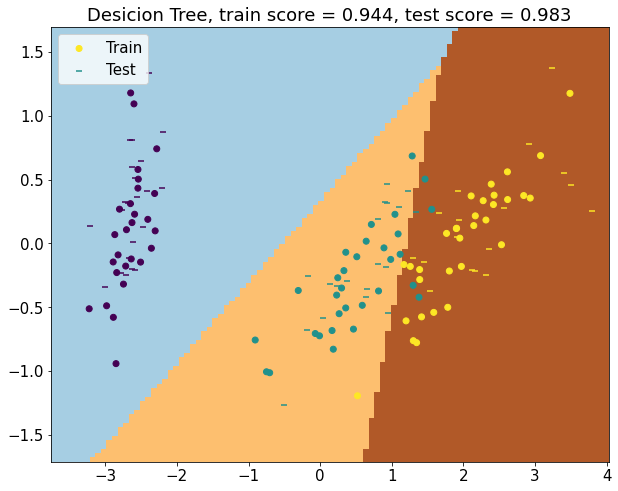

In [22]:
_, ax = plt.subplots(figsize=(10, 8))

DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

ax.set_title(f'Desicion Tree, train score = {np.round(train_score, 3)}, test score = {np.round(test_score, 3)}')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test', marker='_')
ax.legend()
plt.show()

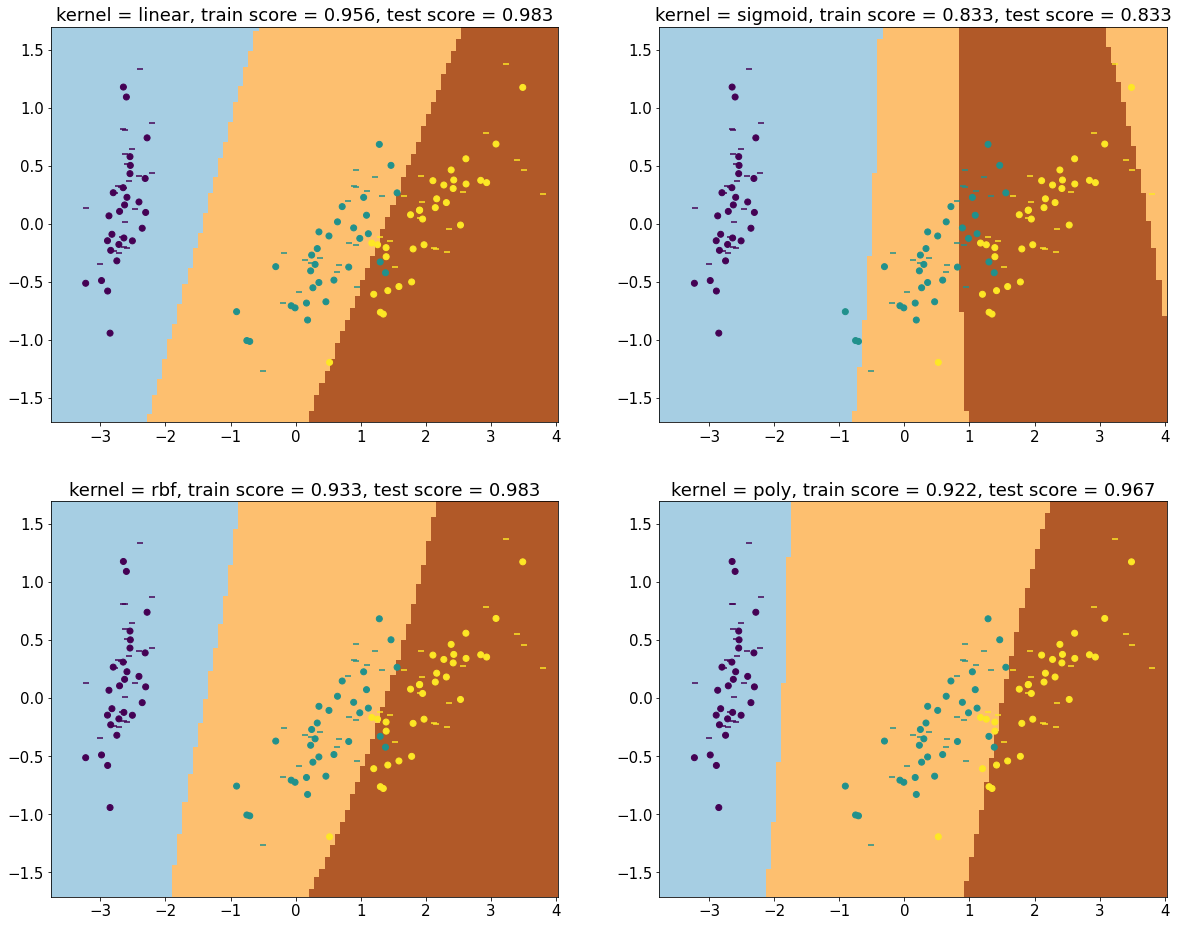

In [23]:
kernels = ['linear', 'sigmoid', 'rbf', 'poly']

_, axs = plt.subplots(2, 2, figsize=(20, 16))


for i, ax in enumerate(axs.ravel()):

    clf = svm.SVC(kernel=kernels[i])
    clf = clf.fit(X_train, y_train)

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap=plt.cm.Paired,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        eps=0.5,
    )

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    ax.set_title(f'kernel = {kernels[i]}, train score = {np.round(train_score, 3)}, test score = {np.round(test_score, 3)}')
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test', marker='_')
    # ax.legend()
    # leg.set_color('red')

plt.show()